In [1]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=648c615ad7a1c5df6d7cb80bf56949c7de38fbf869be9604c3635266b85d26ae
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

## **Load the Data**

In [3]:
Transaction_data1 = pd.read_csv("Transactional_data_retail_01.csv")
Transaction_data2 = pd.read_csv("Transactional_data_retail_02.csv")
customer_data = pd.read_csv("CustomerDemographics.csv")
product_data = pd.read_csv("ProductInfo.csv")

## **EDA and Preprocessing**

In [4]:
Transaction_data1.shape, Transaction_data2.shape, customer_data.shape, product_data.shape

((525461, 6), (541910, 6), (49, 2), (8818, 2))

In [5]:
Transaction_data1.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021


In [6]:
Transaction_data2.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,536365,85123A,6,2.55,17850.0,01-12-2022
1,536365,71053,6,3.39,17850.0,01-12-2022
2,536365,84406B,8,2.75,17850.0,01-12-2022
3,536365,84029G,6,3.39,17850.0,01-12-2022
4,536365,84029E,6,3.39,17850.0,01-12-2022


In [7]:
Transaction_data1['InvoiceDate'] = pd.to_datetime(Transaction_data1['InvoiceDate'],dayfirst=True)
Transaction_data2['InvoiceDate'] = pd.to_datetime(Transaction_data2['InvoiceDate'],dayfirst=True)

In [8]:
Transaction_data = pd.concat([Transaction_data1,Transaction_data2])

In [9]:
Transaction_data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,2021-12-01
1,489434,79323P,12,6.75,13085.0,2021-12-01
2,489434,79323W,12,6.75,13085.0,2021-12-01
3,489434,22041,48,2.10,13085.0,2021-12-01
4,489434,21232,24,1.25,13085.0,2021-12-01


In [10]:
Transaction_data.drop_duplicates().head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,2021-12-01
1,489434,79323P,12,6.75,13085.0,2021-12-01
2,489434,79323W,12,6.75,13085.0,2021-12-01
3,489434,22041,48,2.10,13085.0,2021-12-01
4,489434,21232,24,1.25,13085.0,2021-12-01


In [12]:
Transaction_data["Revenue"] = Transaction_data["Quantity"] * Transaction_data["Price"]
Transaction_data["Year"] = Transaction_data['InvoiceDate'].dt.year
Transaction_data["Month"] = Transaction_data['InvoiceDate'].dt.month
Transaction_data["Day"] = Transaction_data['InvoiceDate'].dt.day
Transaction_data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Revenue,Year,Month,Day
0,489434,85048,12,6.95,13085.0,2021-12-01,83.4,2021,12,1
1,489434,79323P,12,6.75,13085.0,2021-12-01,81.0,2021,12,1
2,489434,79323W,12,6.75,13085.0,2021-12-01,81.0,2021,12,1
3,489434,22041,48,2.10,13085.0,2021-12-01,100.8,2021,12,1
4,489434,21232,24,1.25,13085.0,2021-12-01,30.0,2021,12,1


In [13]:
Transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Quantity     1067371 non-null  int64         
 3   Price        1067371 non-null  float64       
 4   Customer ID  824364 non-null   float64       
 5   InvoiceDate  1067371 non-null  datetime64[ns]
 6   Revenue      1067371 non-null  float64       
 7   Year         1067371 non-null  int32         
 8   Month        1067371 non-null  int32         
 9   Day          1067371 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(2)
memory usage: 77.4+ MB


## **Statistical Summary of Transaction data**

In [14]:
Transaction_data[["Quantity", "Price", "Revenue"]].describe()

,Quantity,Price,Revenue
count,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00,1.806987e+01
std,1.727058e+02,1.235531e+02,2.924202e+02
min,-8.099500e+04,-5.359436e+04,-1.684696e+05
25%,1.000000e+00,1.250000e+00,3.750000e+00
50%,3.000000e+00,2.100000e+00,9.900000e+00
75%,1.000000e+01,4.150000e+00,1.770000e+01
max,8.099500e+04,3.897000e+04,1.684696e+05


## **Customer Data**

In [15]:
customer_data.head()

,Customer ID,Country
0,13085,United Kingdom
1,13078,United Kingdom
2,15362,United Kingdom
3,18102,United Kingdom
4,12682,France


## **Product Data and Statistical Summary**

In [16]:
product_data.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [17]:
product_data.describe()

,StockCode,Description
count,8818,6367
unique,5152,5697
top,20713,check
freq,9,146


In [96]:
# Droping Duplicates
product_data_unique = product_data.drop_duplicates(subset='StockCode')
customer_data_unique = customer_data.drop_duplicates(subset='Customer ID')

In [21]:
# Data merging using SQL
query = '''
SELECT
    t.Invoice,
    t.StockCode,
    t.Quantity,
    t.Price,
    t."Customer ID",
    t.InvoiceDate,
    t.Revenue,
    t.Year,
    t.Month,
    t.Day,
    c.Country,
    p.Description
FROM
    Transaction_data t
LEFT JOIN
    product_data_unique p ON t.StockCode = p.StockCode
LEFT JOIN
    customer_data_unique c ON t."Customer ID" = c."Customer ID"
'''

data = psql.sqldf(query, locals())

In [22]:
data = pd.DataFrame(data)
data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Revenue,Year,Month,Day,Country,Description
0,489434,85048,12,6.95,13085.0,2021-12-01 00:00:00.000000,83.4,2021,12,1,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,2021-12-01 00:00:00.000000,81.0,2021,12,1,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,12,6.75,13085.0,2021-12-01 00:00:00.000000,81.0,2021,12,1,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,48,2.10,13085.0,2021-12-01 00:00:00.000000,100.8,2021,12,1,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,24,1.25,13085.0,2021-12-01 00:00:00.000000,30.0,2021,12,1,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX


In [23]:
data.shape

(1067371, 12)

In [24]:
data.isna().sum()

,0
Invoice,0
StockCode,0
Quantity,0
Price,0
Customer ID,243007
InvoiceDate,0
Revenue,0
Year,0
Month,0
Day,0


In [25]:
len(data.Invoice.unique()), len(data.StockCode.unique()), len(data["Customer ID"].unique()), len(data.Country.unique())

(53628, 5305, 5943, 7)

## **Grouping Data by Customer ID**

In [97]:
customer_summary = Transaction_data.groupby('Customer ID').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spend=('Revenue', 'sum')
).reset_index()
customer_summary["Customer ID"] = customer_summary["Customer ID"].astype(str)

## **Top 10 Customers by Quantity and Spend**

In [30]:
# By Quantity
top_10_customers_by_quantity = customer_summary.nlargest(10, 'Total_Quantity')
top_10_customers_by_quantity

,Customer ID,Total_Quantity,Total_Spend
2300,14646.0,365220,523342.07
1556,13902.0,218090,30411.26
5756,18102.0,187110,598215.22
1348,13694.0,185442,190825.52
1810,14156.0,163910,296564.69
2565,14911.0,143741,270248.53
5165,17511.0,117913,171885.98
4338,16684.0,101095,141502.25
1952,14298.0,99854,90489.31
69,12415.0,91315,143269.29


In [31]:
# By Spend
top_10_customers_by_spend = customer_summary.nlargest(10, 'Total_Spend')
top_10_customers_by_spend

,Customer ID,Total_Quantity,Total_Spend
5756,18102.0,187110,598215.22
2300,14646.0,365220,523342.07
1810,14156.0,163910,296564.69
2565,14911.0,143741,270248.53
5104,17450.0,81644,233579.39
1348,13694.0,185442,190825.52
5165,17511.0,117913,171885.98
69,12415.0,91315,143269.29
4338,16684.0,101095,141502.25
2715,15061.0,79985,136391.48


## **Ploting Chart**

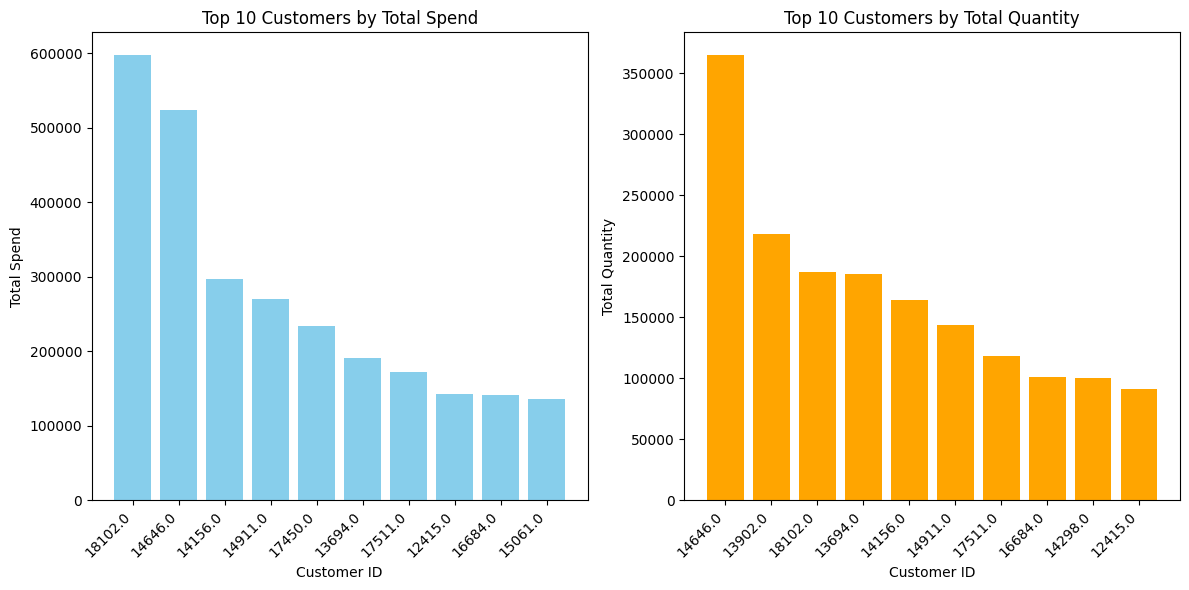

In [32]:
# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for Total Spend
plt.subplot(1, 2, 1)
plt.bar(top_10_customers_by_spend['Customer ID'], top_10_customers_by_spend['Total_Spend'], color='skyblue')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')

# Bar chart for Total Quantity
plt.subplot(1, 2, 2)
plt.bar(top_10_customers_by_quantity['Customer ID'], top_10_customers_by_quantity['Total_Quantity'], color='orange')
plt.title('Top 10 Customers by Total Quantity')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## **Grouping Data by StockCode**

In [33]:
product_summary = Transaction_data.groupby('StockCode').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

product_summary.head()

,StockCode,Total_Quantity,Total_Revenue
0,10002,7790,6214.35
1,10002R,4,20.57
2,10080,597,129.29
3,10109,0,1.68
4,10120,-8350,139.80


## **Top 10 Product by Quantity and Revenue**

In [34]:
top_10_product_by_revenue = product_summary.nlargest(10, 'Total_Revenue')
top_10_product_by_quantity = product_summary.nlargest(10, 'Total_Quantity')

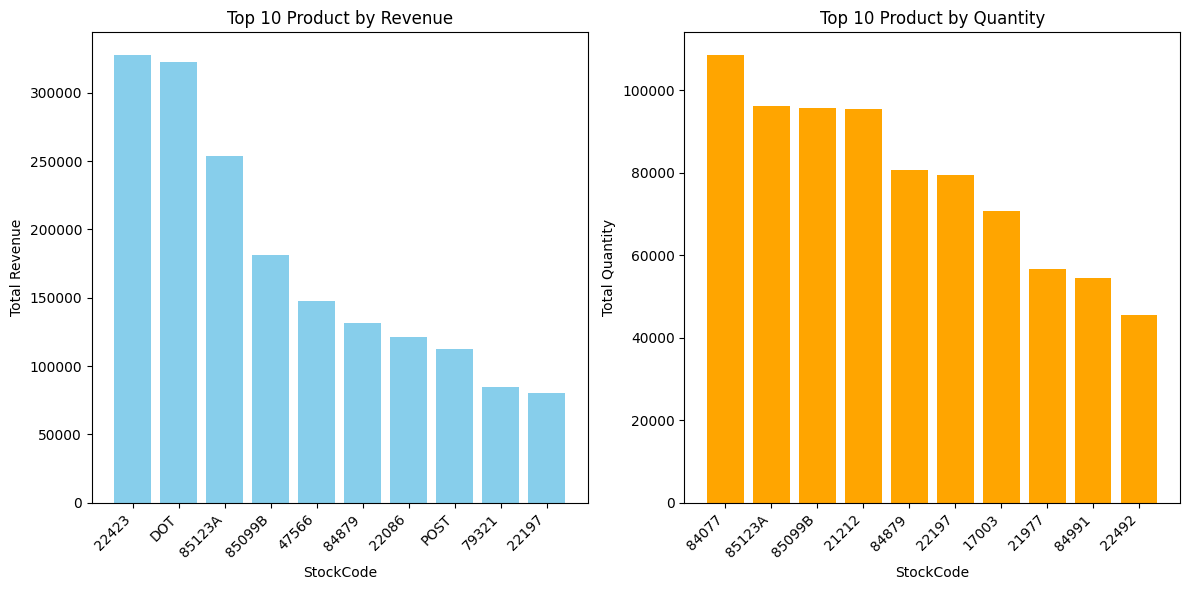

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.bar(top_10_product_by_revenue["StockCode"], top_10_product_by_revenue["Total_Revenue"], color="skyblue")
plt.title("Top 10 Product by Revenue")
plt.xlabel("StockCode")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")

plt.subplot(1,2,2)
plt.bar(top_10_product_by_quantity["StockCode"], top_10_product_by_quantity["Total_Quantity"], color="orange")
plt.title("Top 10 Product by Quantity")
plt.xlabel("StockCode")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## **Grouping Data by Country**

In [40]:
demographic_summary = data.groupby('Country').agg(
    Total_Customers=('Customer ID', 'count'),
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

demographic_summary

,Country,Total_Customers,Total_Quantity,Total_Revenue
0,Australia,449,4763,10984.910
1,Belgium,275,2213,5284.580
2,France,1513,19941,38290.710
3,Netherlands,32,448,777.750
4,USA,1,1,141.000
5,United Kingdom,25411,615503,1384437.072


## **Top 10 Country by Quantity, Revenue and Customers**

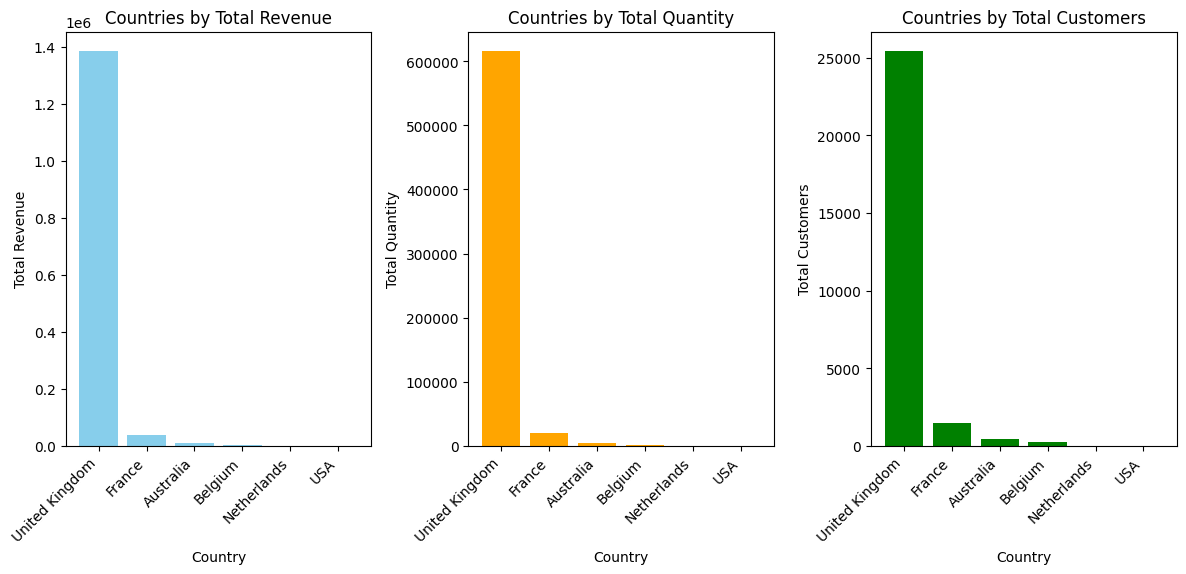

In [41]:
country_by_revenue = demographic_summary.nlargest(10, 'Total_Revenue')
country_by_quantity = demographic_summary.nlargest(10, 'Total_Quantity')
country_by_customers = demographic_summary.nlargest(10, 'Total_Customers')

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(country_by_revenue['Country'], country_by_revenue['Total_Revenue'], color='skyblue')
plt.title('Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
plt.bar(country_by_quantity['Country'], country_by_quantity['Total_Quantity'], color='orange')
plt.title('Countries by Total Quantity')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
plt.bar(country_by_customers['Country'], country_by_customers['Total_Customers'], color='green')
plt.title('Countries by Total Customers')
plt.xlabel('Country')
plt.ylabel('Total Customers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **Top 10 Products Forcasting For next 15 Weeks using by ARIMA, ETS and Prophet models**

In [42]:
TD = Transaction_data.set_index('InvoiceDate')

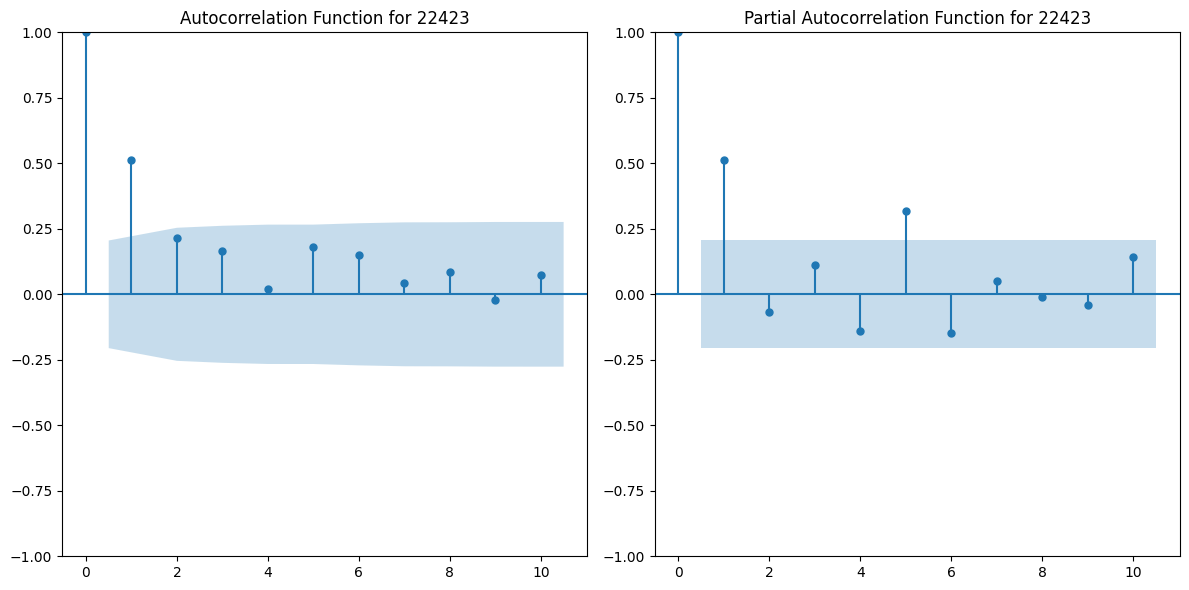

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


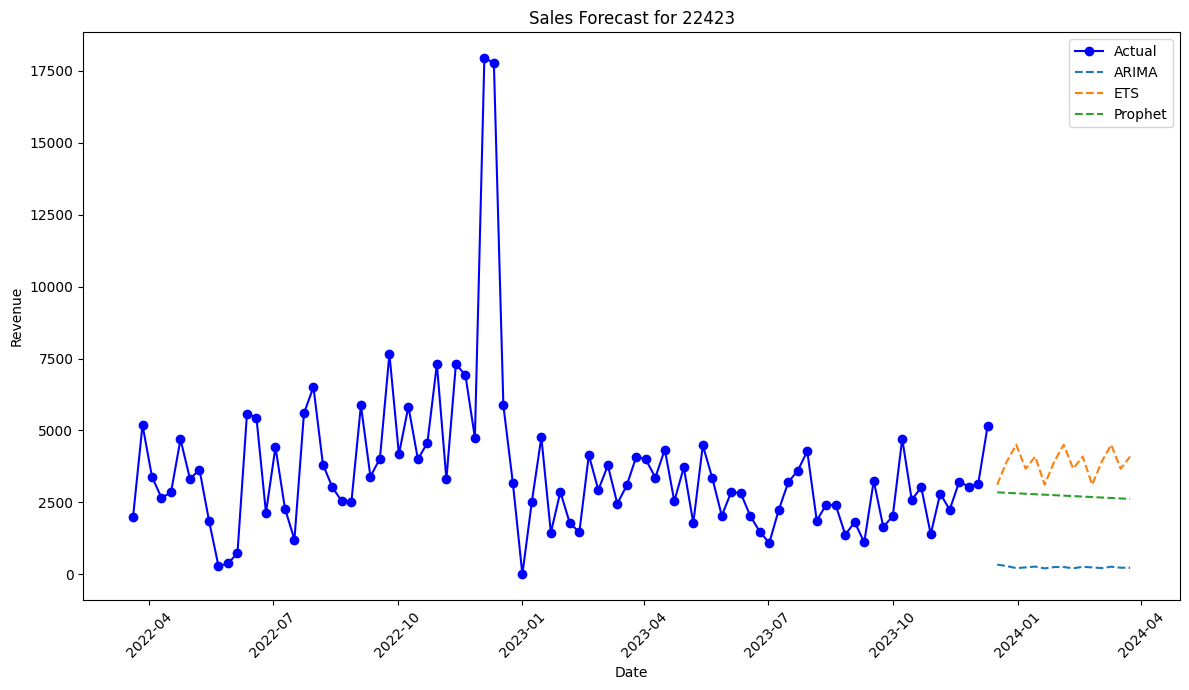

Cross-validation MAE for 22423:
ARIMA: 146.10742378920088
ETS: 1694.0557958906422
Prophet: 2386.2072619606774


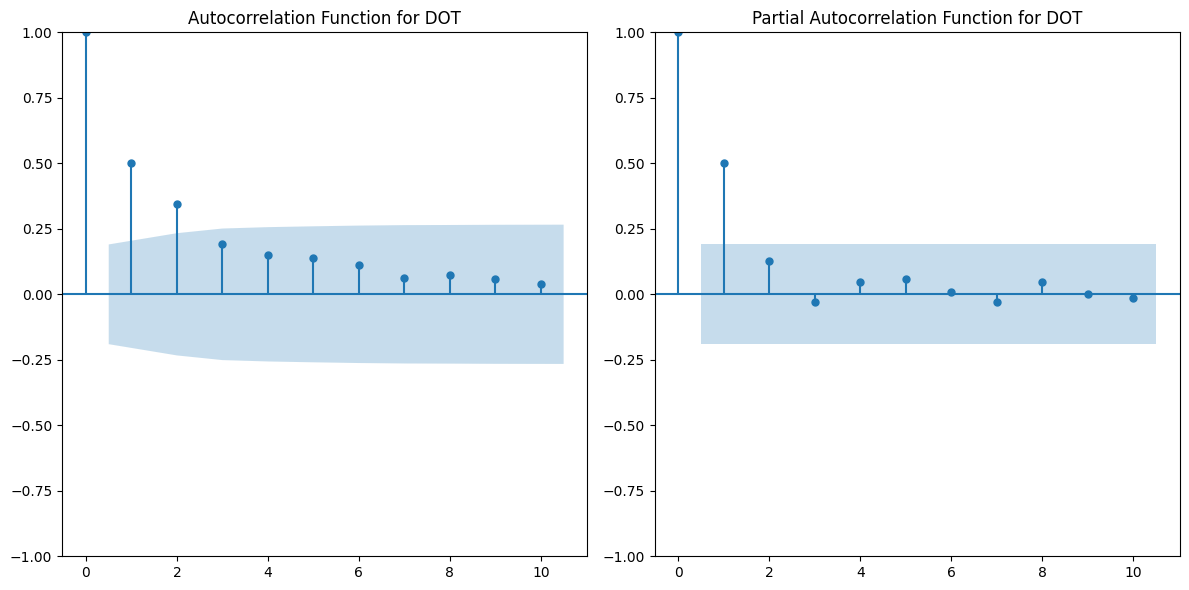

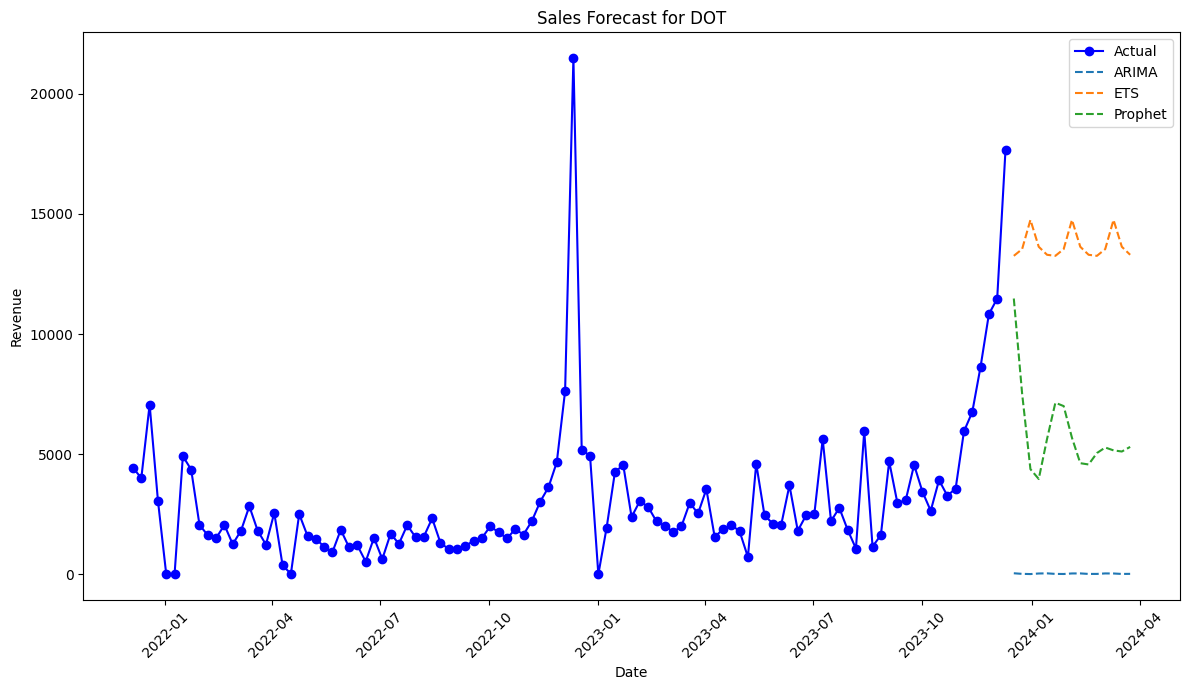

Cross-validation MAE for DOT:
ARIMA: 37.89353680882285
ETS: 3007.803430157975
Prophet: 2240.7133410931306


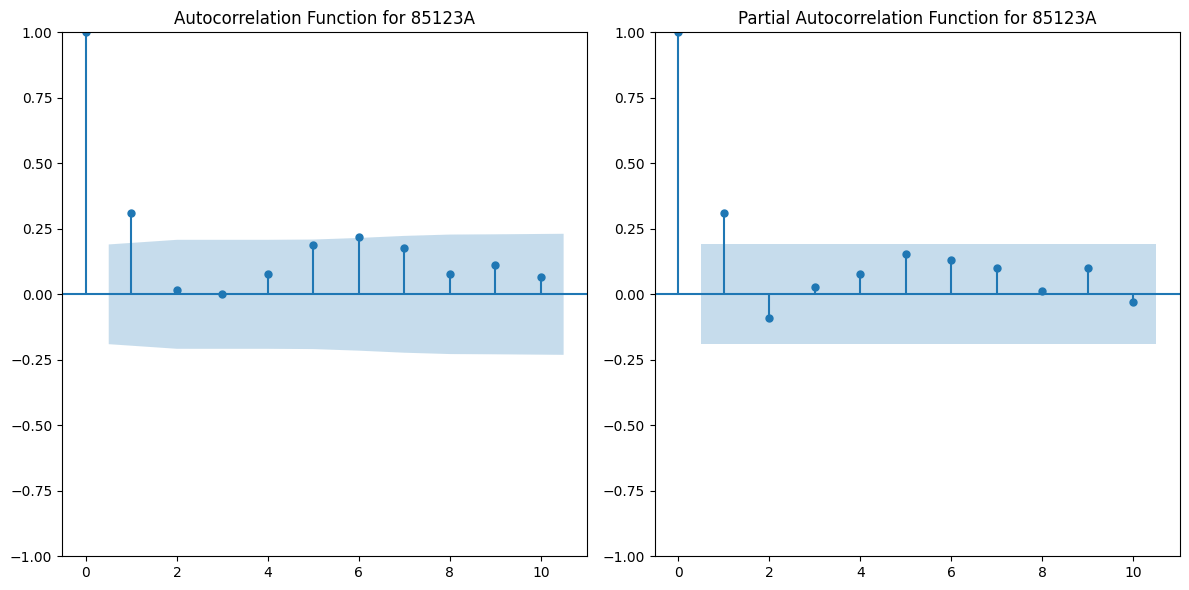

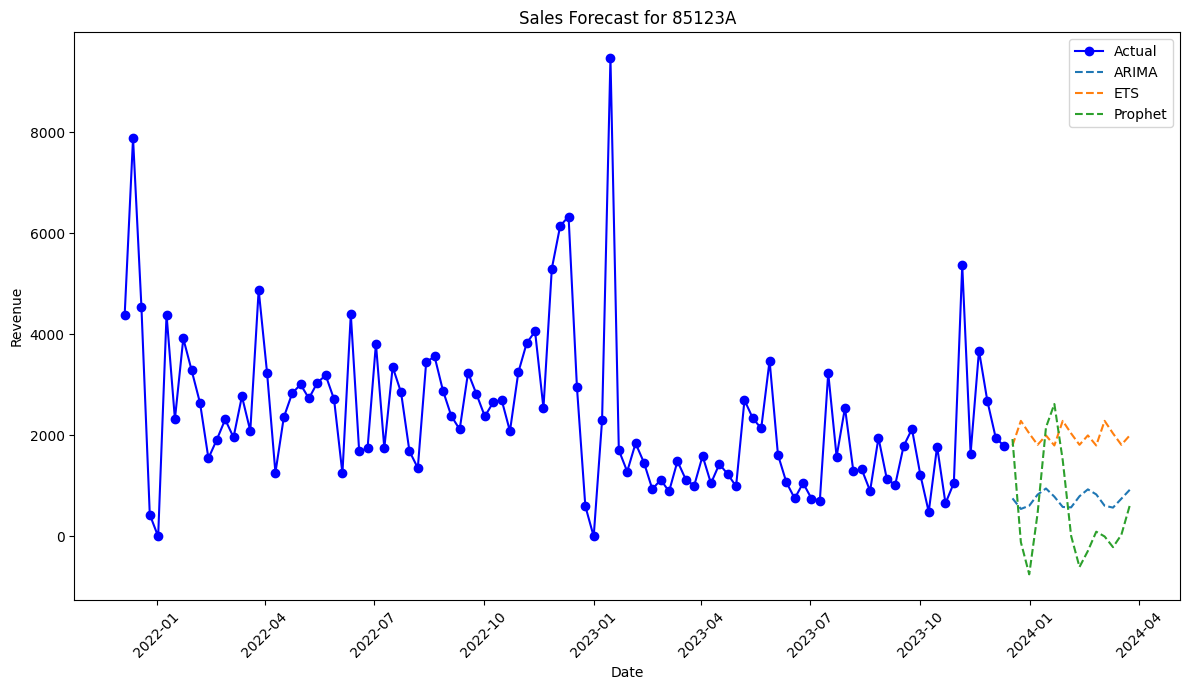

Cross-validation MAE for 85123A:
ARIMA: 635.1442667241151
ETS: 1446.9934372542853
Prophet: 1318.6357727694271


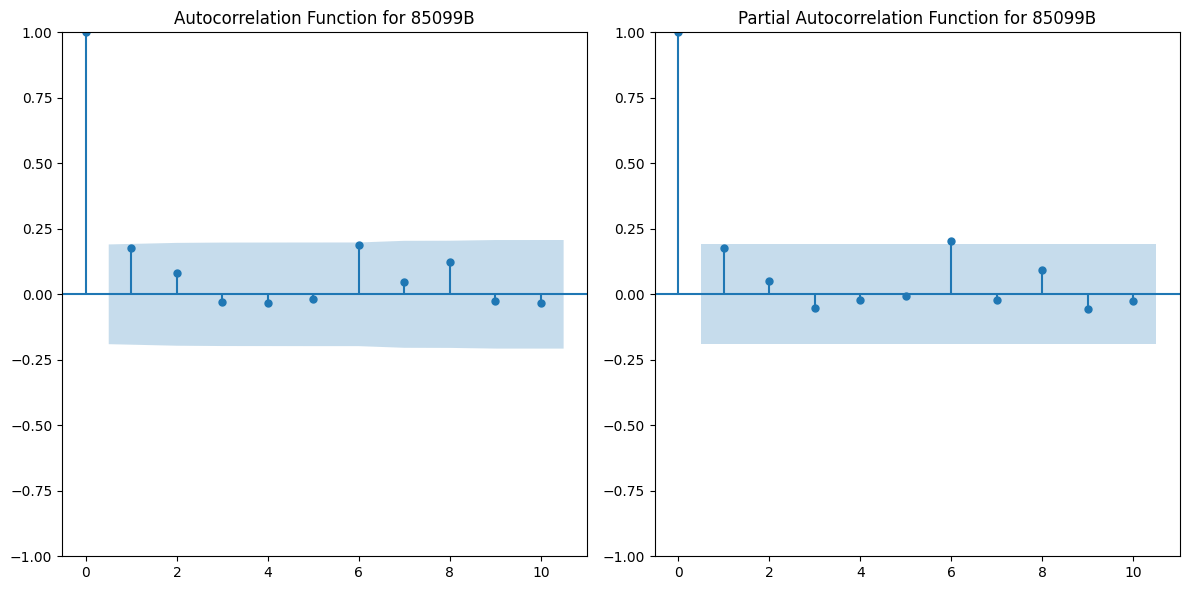

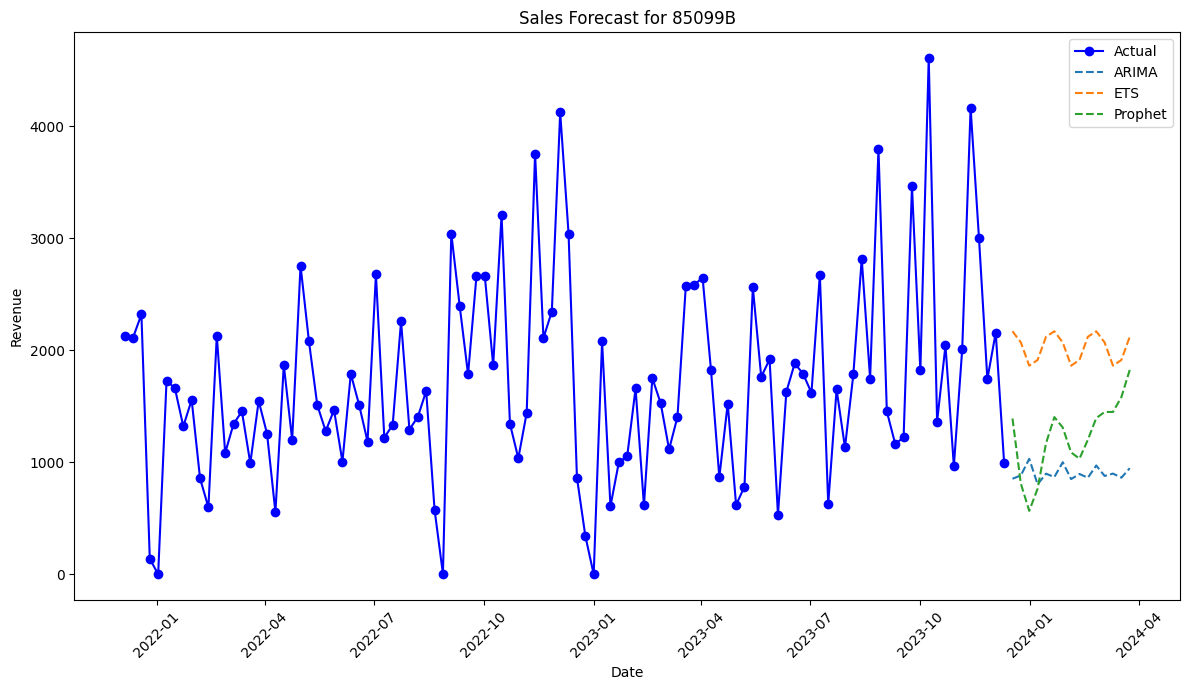

Cross-validation MAE for 85099B:
ARIMA: 479.82902637121487
ETS: 823.2099930997377
Prophet: 823.5076494035277


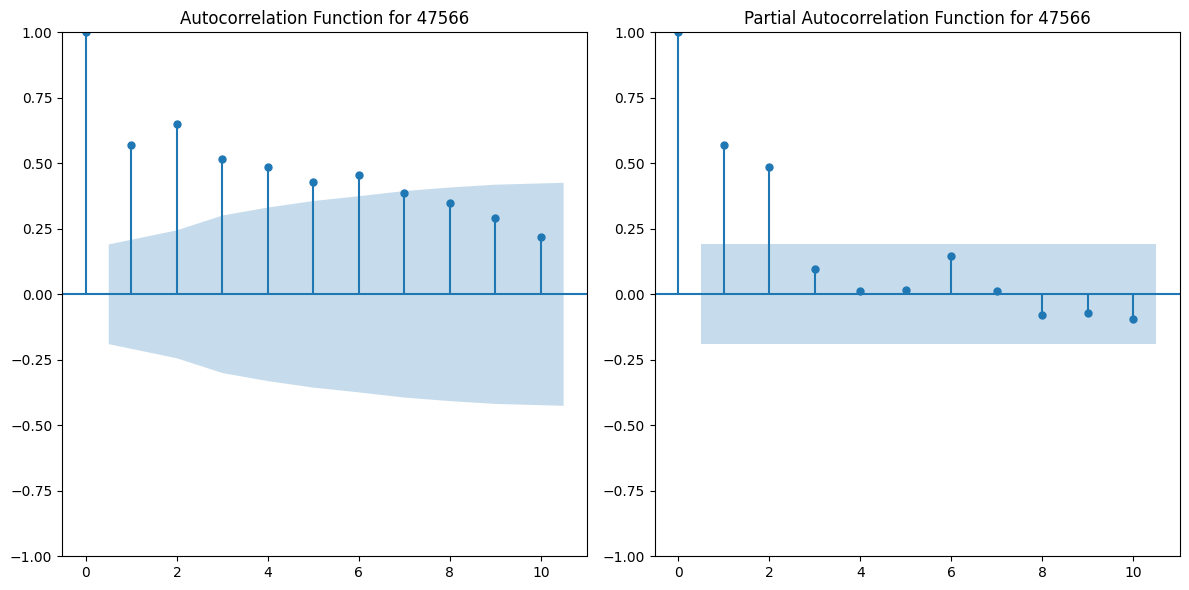

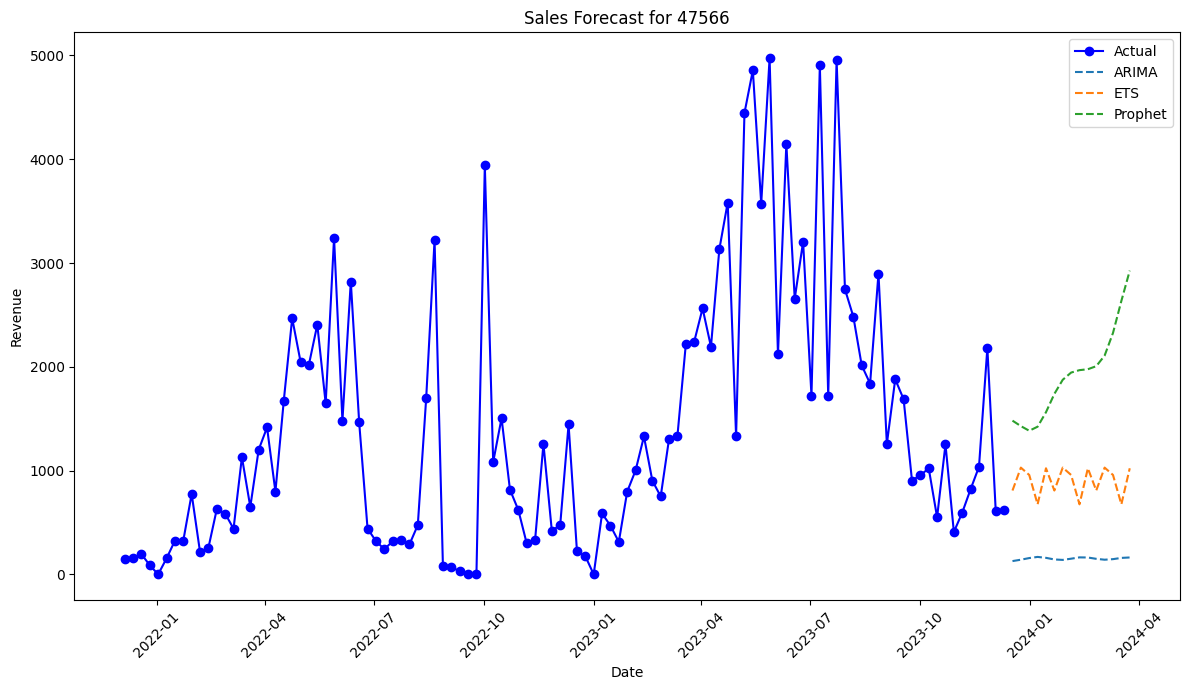

Cross-validation MAE for 47566:
ARIMA: 251.65253277081973
ETS: 1279.4270126007318
Prophet: 1413.655687592023


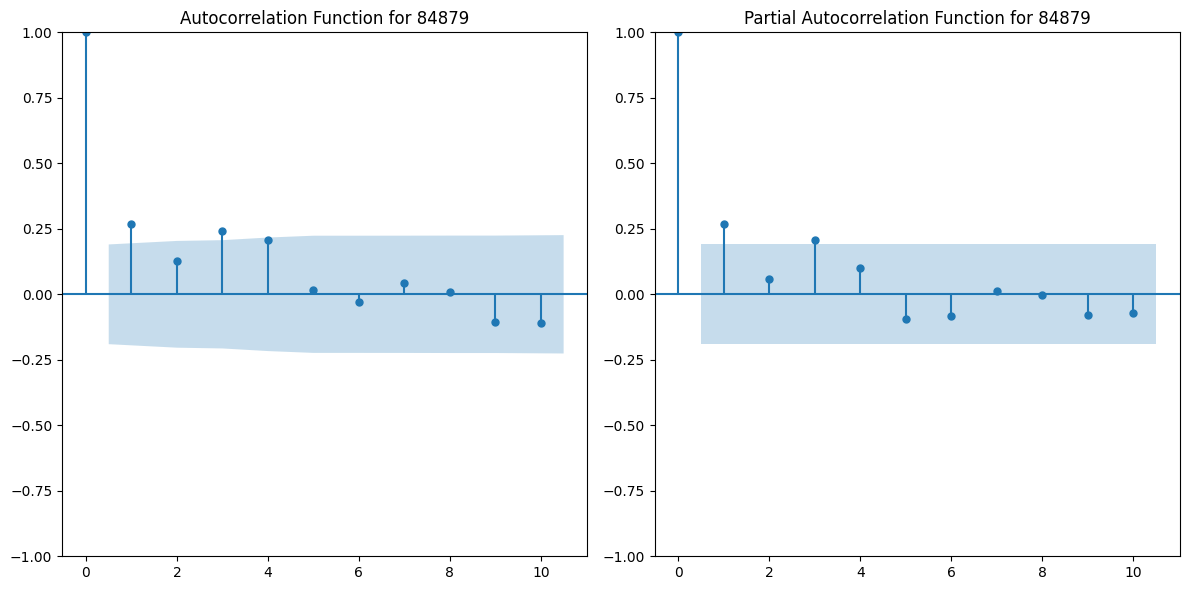

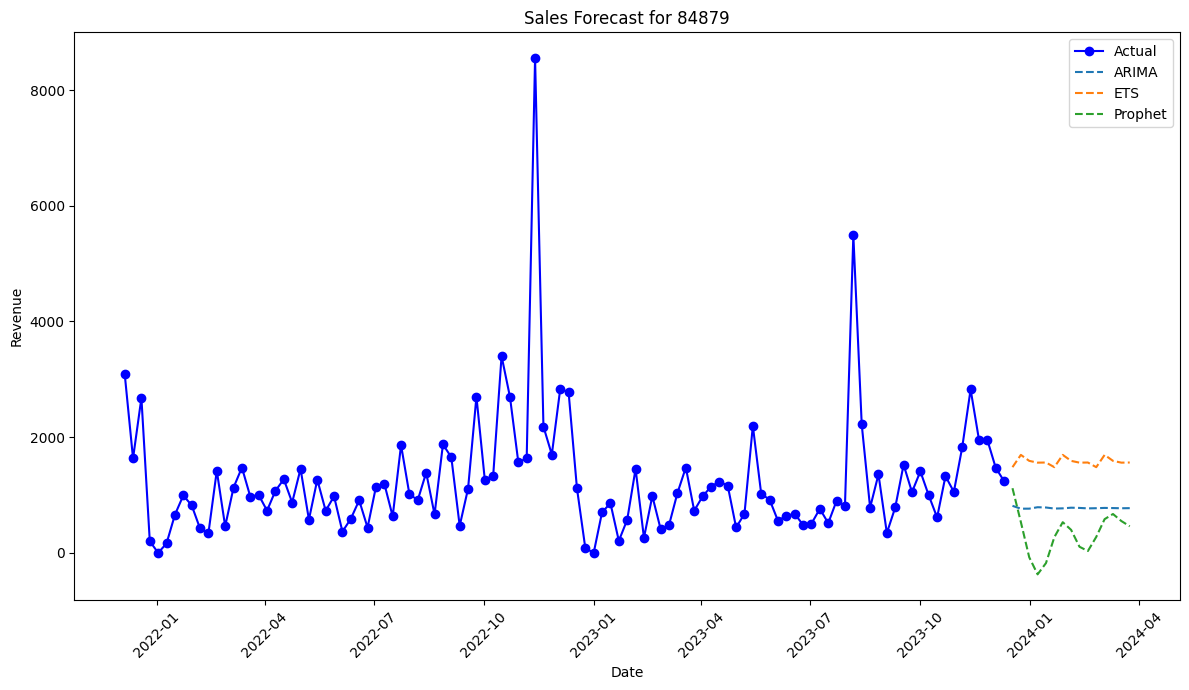

Cross-validation MAE for 84879:
ARIMA: 628.435804086197
ETS: 972.7912828534002
Prophet: 1029.0453675474814


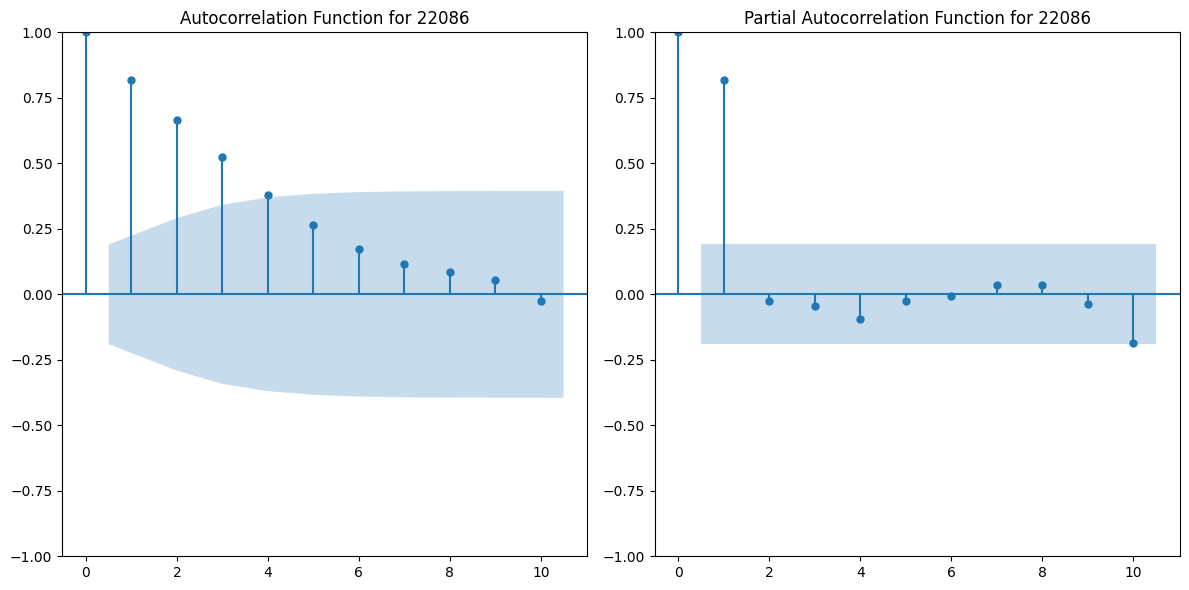

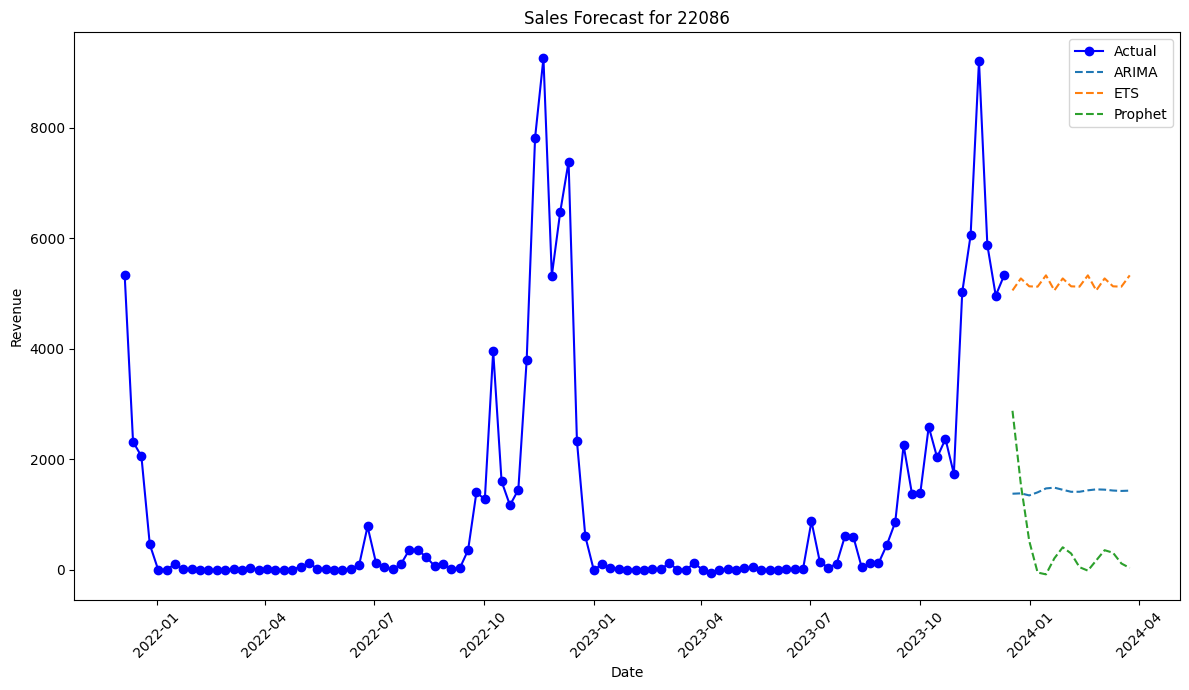

Cross-validation MAE for 22086:
ARIMA: 598.652936236301
ETS: 2020.8764793207636
Prophet: 2635.4767127623018


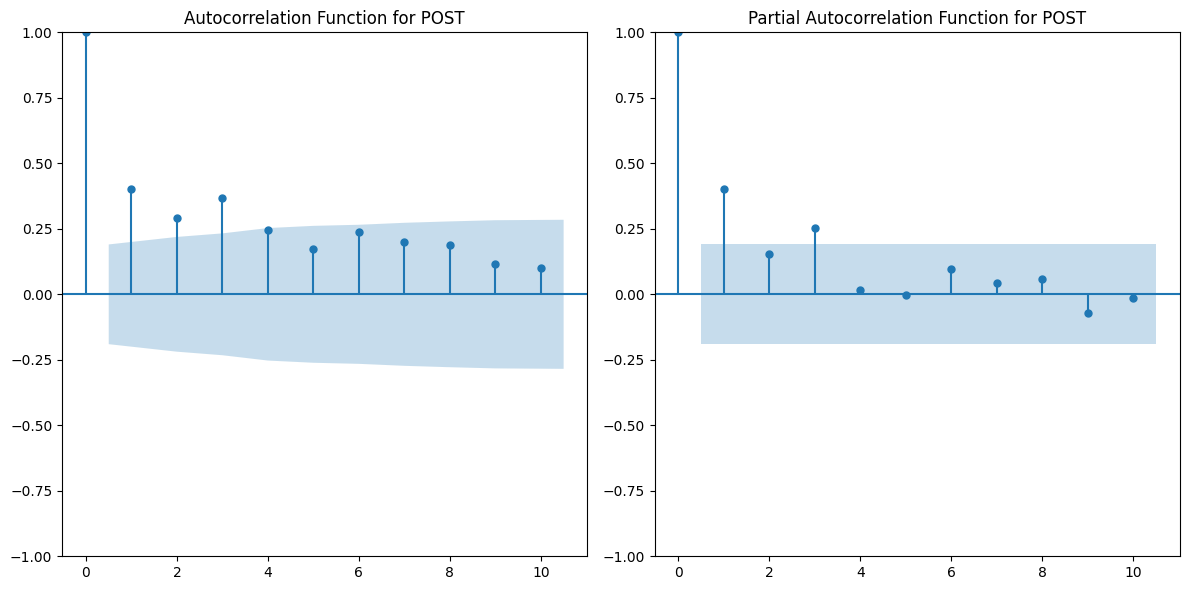

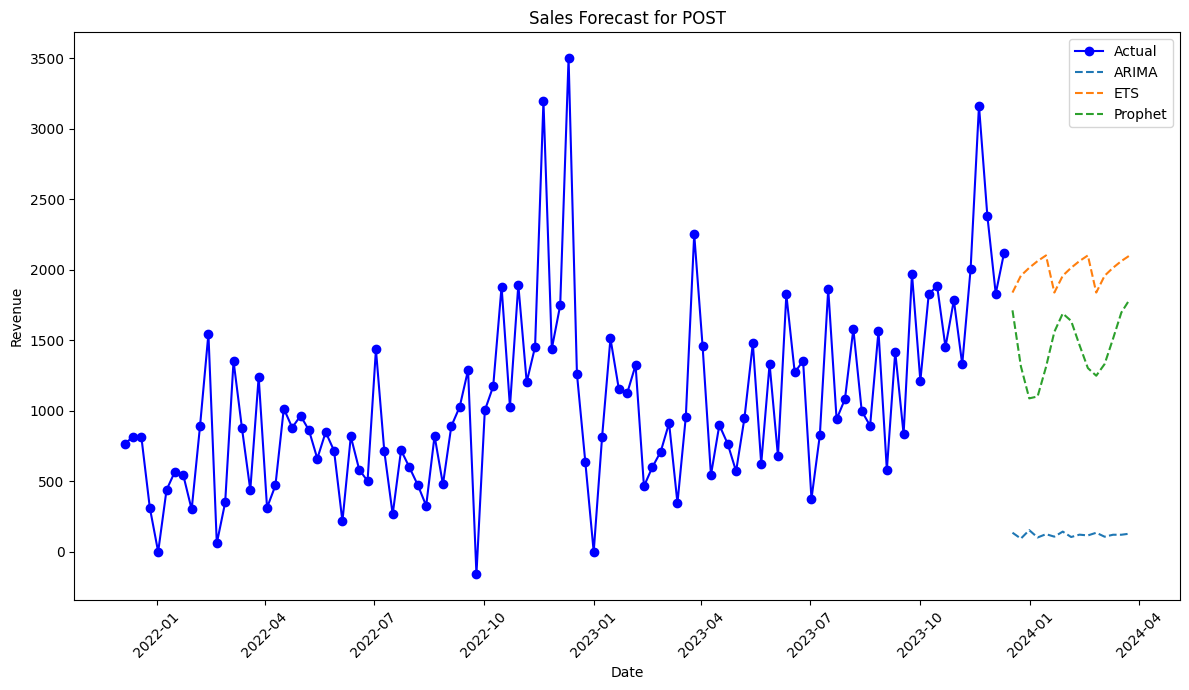

Cross-validation MAE for POST:
ARIMA: 93.79511667793648
ETS: 656.8046298134333
Prophet: 585.2881516976202


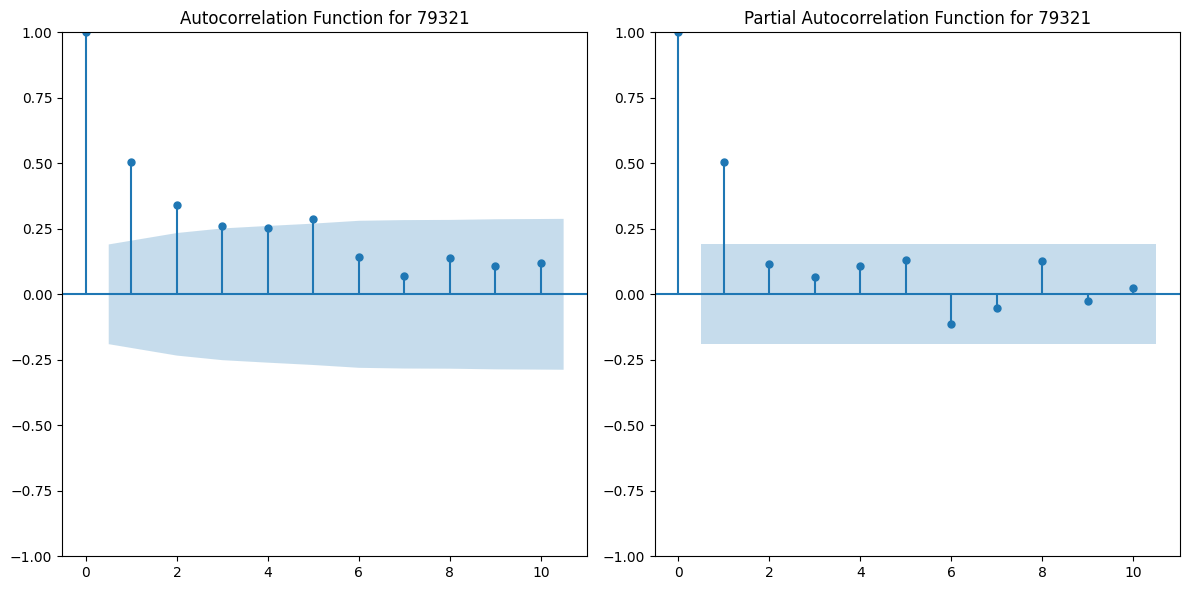

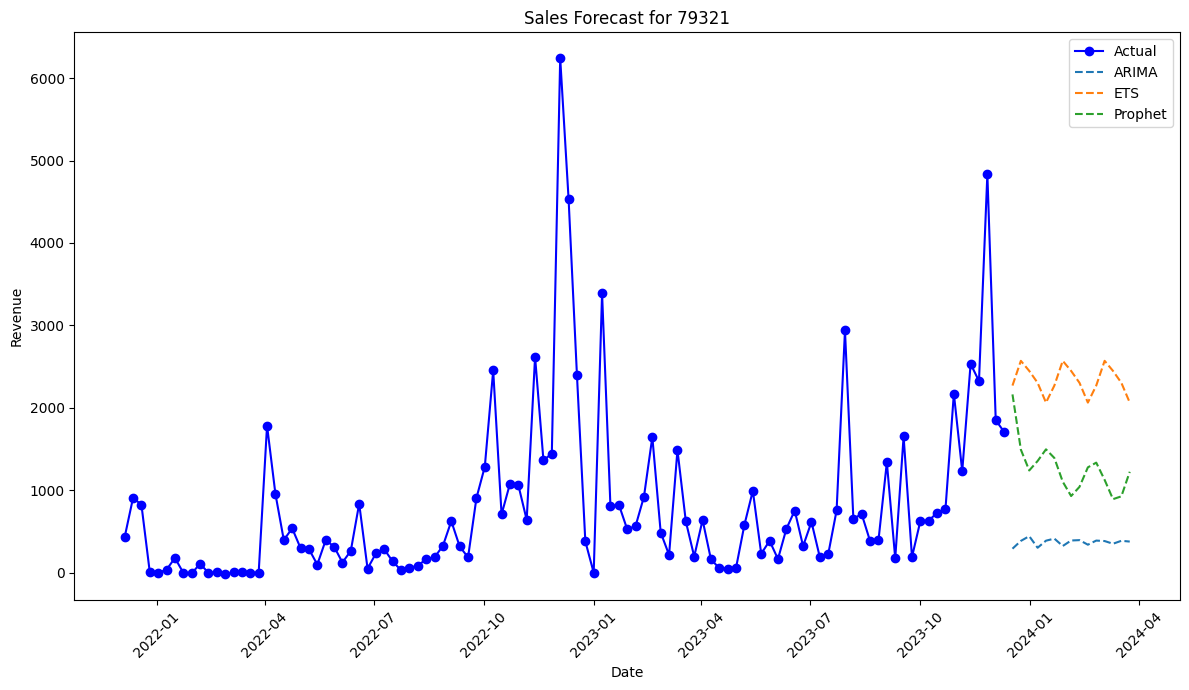

Cross-validation MAE for 79321:
ARIMA: 243.87194368398278
ETS: 1195.289466298213
Prophet: 1030.219191552148


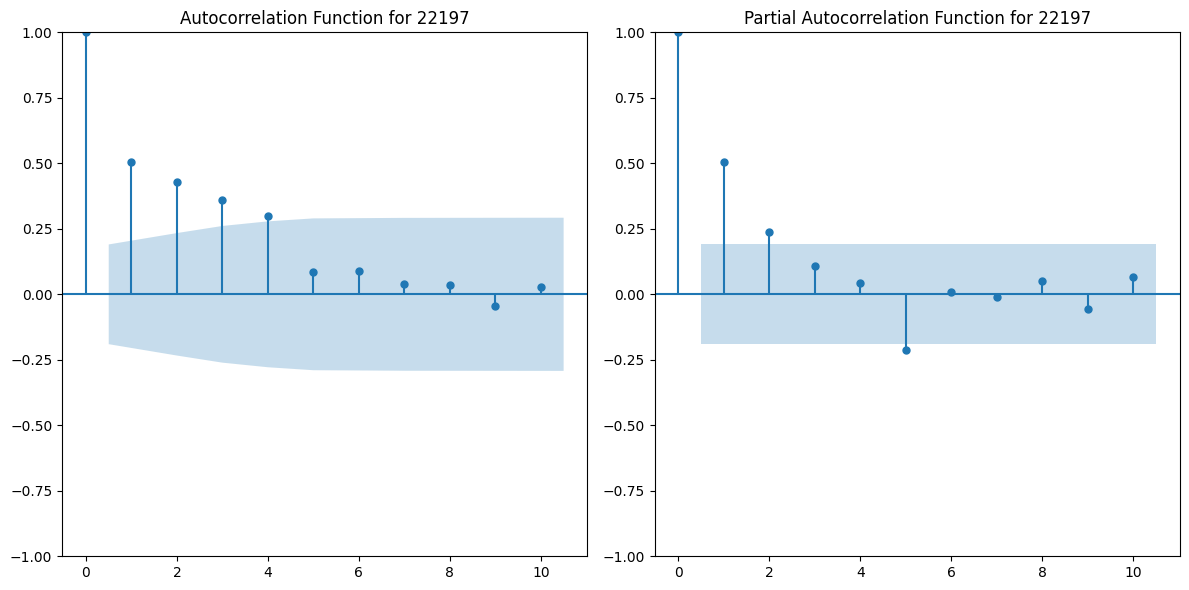

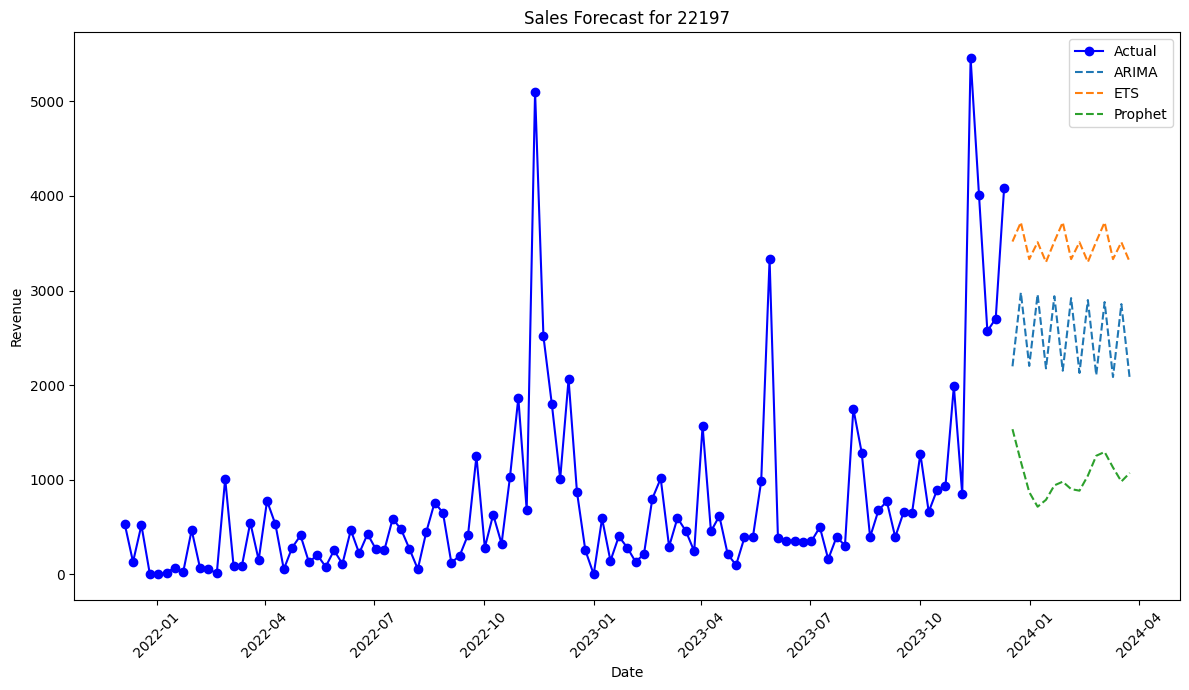

Cross-validation MAE for 22197:
ARIMA: 1856.046668032795
ETS: 768.8777140341424
Prophet: 779.126134300164


In [49]:
import logging
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
logging.getLogger("prophet").setLevel(logging.WARNING)
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters")
warnings.filterwarnings("ignore", message="Non-invertible starting AR parameters")


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select top 10 products based on quantity sold
top_products = data.groupby('StockCode')['Revenue'].sum().nlargest(10).index
top_data = TD[TD['StockCode'].isin(top_products)]

# Function to fit and evaluate models using cross-validation
def evaluate_models(product_data, cv_splits=5):
    results = {}
    tscv = TimeSeriesSplit(n_splits=cv_splits)

    mae_arima, mae_ets, mae_prophet = [], [], []

    # Iterate over time-series splits
    for train_index, test_index in tscv.split(product_data):
        train, test = product_data.iloc[train_index], product_data.iloc[test_index]

        # ARIMA
        model_arima = ARIMA(train['Quantity'], order=(3, 1, 5))
        model_arima_fit = model_arima.fit()
        forecast_arima = model_arima_fit.forecast(steps=len(test))
        mae_arima.append(mean_absolute_error(test['Quantity'], forecast_arima))

        # Exponential Smoothing
        try:
            model_ets = ExponentialSmoothing(train['Revenue'], seasonal='add', seasonal_periods=5)
            model_ets_fit = model_ets.fit()
            forecast_ets = model_ets_fit.forecast(steps=len(test))
        except ValueError:
            model_ets = ExponentialSmoothing(train['Revenue'])
            model_ets_fit = model_ets.fit()
            forecast_ets = model_ets_fit.forecast(steps=len(test))

        mae_ets.append(mean_absolute_error(test['Revenue'], forecast_ets))

        # Prophet
        prophet_data = train.reset_index().rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
        model_prophet = Prophet()
        model_prophet.fit(prophet_data)
        future = model_prophet.make_future_dataframe(periods=len(test), freq='W')
        forecast_prophet = model_prophet.predict(future)
        forecast_prophet = forecast_prophet['yhat'].tail(len(test)).values
        mae_prophet.append(mean_absolute_error(test['Revenue'], forecast_prophet))

    # Store average MAE for each model across folds
    results['ARIMA_MAE'] = np.mean(mae_arima)
    results['ETS_MAE'] = np.mean(mae_ets)
    results['Prophet_MAE'] = np.mean(mae_prophet)

    return results

# Forecast function for final prediction on the full data
def final_forecast_models(product_data, steps=15):
    forecasts = {}

    # ARIMA
    model_arima = ARIMA(product_data['Quantity'], order=(3, 1, 5))
    model_arima_fit = model_arima.fit()
    forecasts['ARIMA'] = model_arima_fit.forecast(steps=steps)

    # Exponential Smoothing
    try:
        model_ets = ExponentialSmoothing(product_data['Revenue'], seasonal='add', seasonal_periods=5)
        model_ets_fit = model_ets.fit()
        forecasts['ETS'] = model_ets_fit.forecast(steps=steps)
    except ValueError:
        model_ets = ExponentialSmoothing(product_data['Revenue'])
        model_ets_fit = model_ets.fit()
        forecasts['ETS'] = model_ets_fit.forecast(steps=steps)

    # Prophet
    prophet_data = product_data.reset_index().rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
    model_prophet = Prophet()
    model_prophet.fit(prophet_data)
    future = model_prophet.make_future_dataframe(periods=steps, freq='W')
    forecast_prophet = model_prophet.predict(future)
    forecasts['Prophet'] = forecast_prophet['yhat'].tail(steps).values

    return forecasts

for product in top_products:
    product_data = top_data[top_data['StockCode'] == product].resample('W').sum()

    # ACF and PACF plots for visualization
    num_observations = len(product_data)
    max_lags = min(num_observations // 2 - 1, 10)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_acf(product_data['Revenue'].dropna(), lags=max_lags, ax=plt.gca())
    plt.title(f'Autocorrelation Function for {product}')

    plt.subplot(1, 2, 2)
    plot_pacf(product_data['Revenue'].dropna(), lags=max_lags, ax=plt.gca())
    plt.title(f'Partial Autocorrelation Function for {product}')

    plt.tight_layout()
    plt.show()

    # Fit models and evaluate cross-validation performance
    cv_results = evaluate_models(product_data)

    # Final model forecasts
    forecasts = final_forecast_models(product_data)

    # Plot results
    plt.figure(figsize=(12, 7))
    plt.plot(product_data.index, product_data['Revenue'], label='Actual', color='blue', marker='o')  # Actual data

    for model, forecast in forecasts.items():
        # Ensure the forecast has the expected length
        if len(forecast) == 15:
            forecast_index = pd.date_range(start=product_data.index[-1] + pd.Timedelta(weeks=1), periods=15, freq='W')
            plt.plot(forecast_index, forecast, label=model, linestyle='--')
        else:
            print(f"Forecast length mismatch for {model}. Expected 15 weeks, got {len(forecast)}.")

    plt.title(f'Sales Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"Cross-validation MAE for {product}:")
    print(f"ARIMA: {cv_results['ARIMA_MAE']}")
    print(f"ETS: {cv_results['ETS_MAE']}")
    print(f"Prophet: {cv_results['Prophet_MAE']}")


## **Preparing the Data for Machine Learning Models**

In [50]:
data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Revenue,Year,Month,Day,Country,Description
0,489434,85048,12,6.95,13085.0,2021-12-01 00:00:00.000000,83.4,2021,12,1,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,2021-12-01 00:00:00.000000,81.0,2021,12,1,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,12,6.75,13085.0,2021-12-01 00:00:00.000000,81.0,2021,12,1,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,48,2.10,13085.0,2021-12-01 00:00:00.000000,100.8,2021,12,1,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,24,1.25,13085.0,2021-12-01 00:00:00.000000,30.0,2021,12,1,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX


In [51]:
data.shape

(1067371, 12)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Quantity     1067371 non-null  int64  
 3   Price        1067371 non-null  float64
 4   Customer ID  824364 non-null   float64
 5   InvoiceDate  1067371 non-null  object 
 6   Revenue      1067371 non-null  float64
 7   Year         1067371 non-null  int64  
 8   Month        1067371 non-null  int64  
 9   Day          1067371 non-null  int64  
 10  Country      27681 non-null    object 
 11  Description  1051087 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.7+ MB


## **Checking the Outliers in the Dataset**

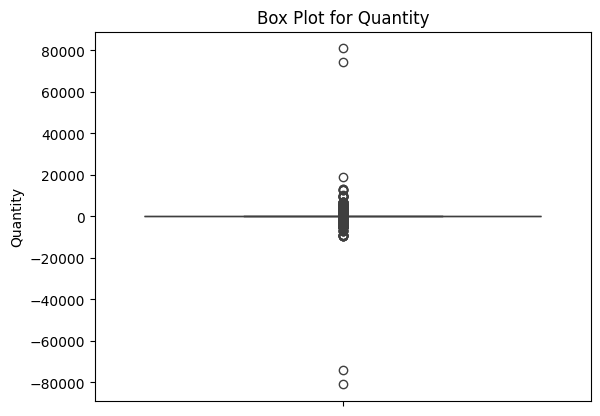

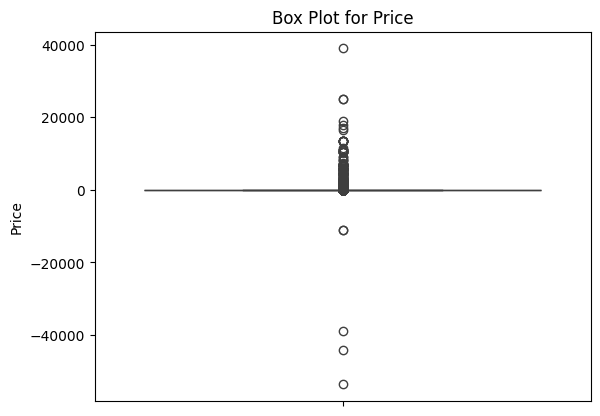

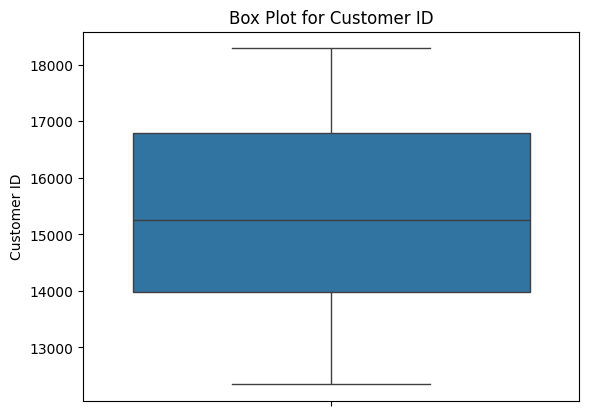

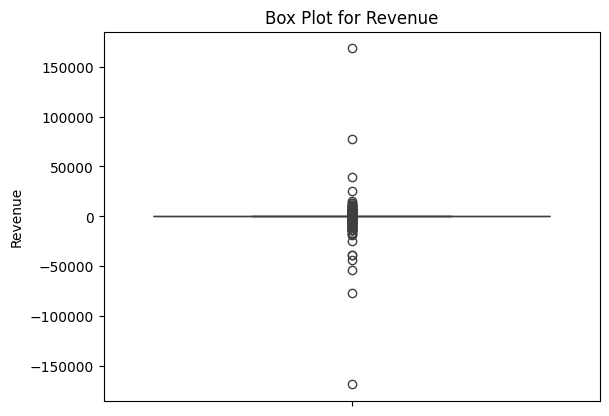

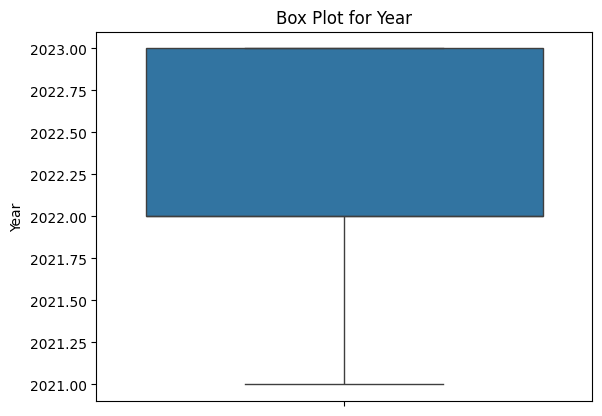

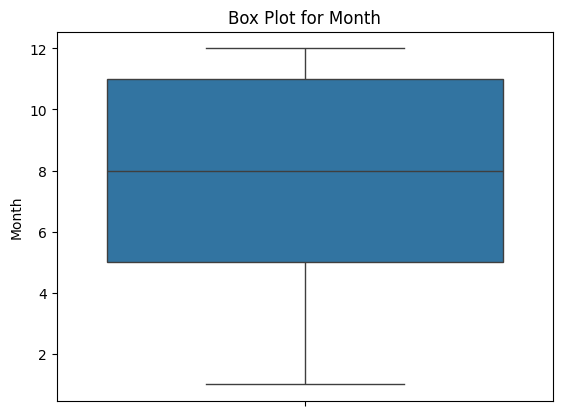

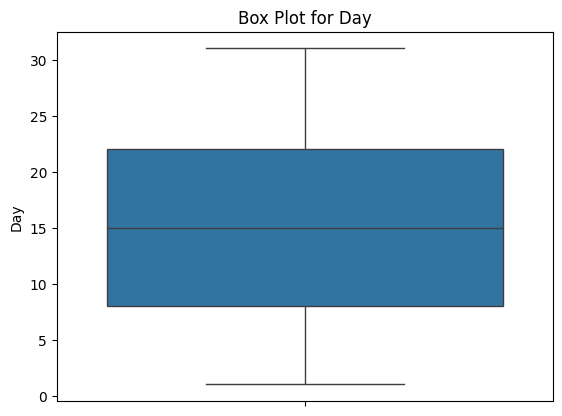

In [54]:
num = data.select_dtypes(include=['int32', 'float64', 'int64'])
for feature in num:
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

We can see some negative outliers in the data mainly in Quantity, Revenue and Price features.

**Handling those outliers**

In [55]:
canceled_orders = data[data['Quantity'] < 0]['Customer ID']
data_filtered = data[~data['Customer ID'].isin(canceled_orders)]

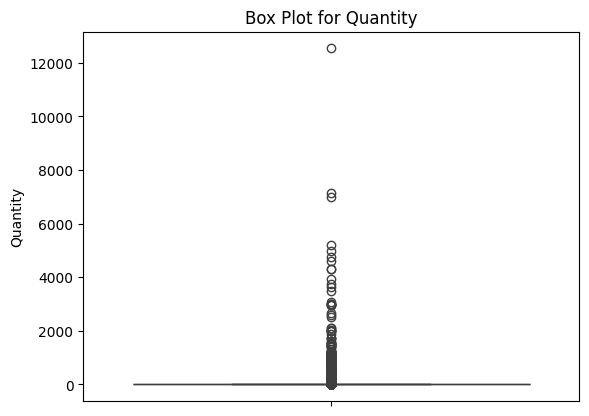

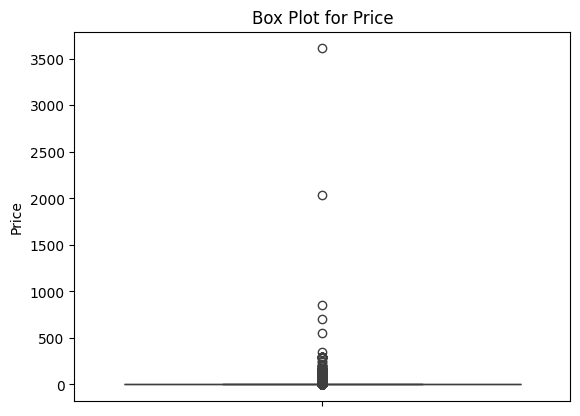

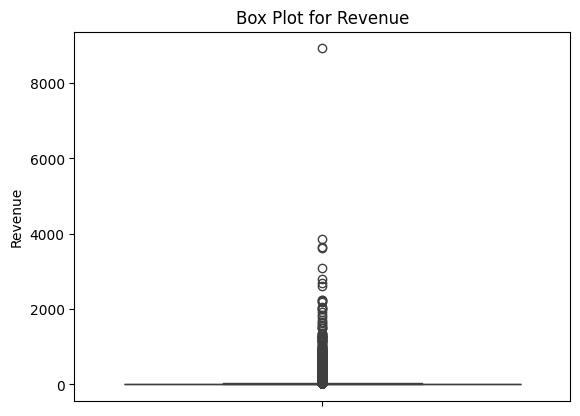

In [56]:
for feature in ["Quantity","Price", "Revenue"]:
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

## **Correlation among the features**

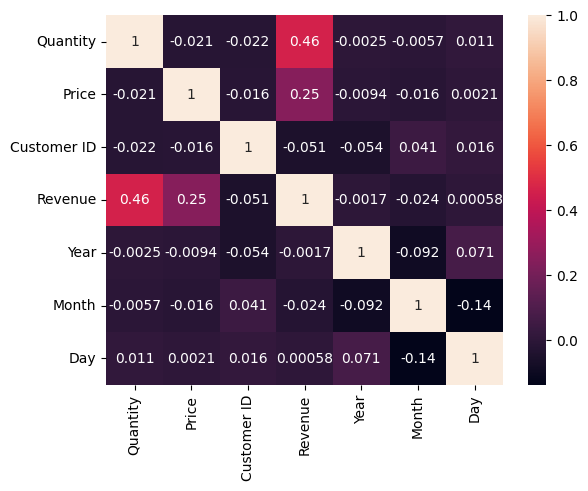

In [57]:
filtered_num = data_filtered.select_dtypes(include=['int32', 'float64', 'int64'])
num_corr = filtered_num.corr()
sns.heatmap(num_corr, annot=True)
plt.show()

## **Data Preprocessing and Model fitting**

In [58]:
x = data_filtered.drop(["InvoiceDate","Revenue", "Customer ID", "Description", "Country", "Year", "Month", "Invoice"], axis=1)
y = data_filtered["Revenue"]

In [59]:
features = x.columns

In [60]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [61]:
x_cat = x.select_dtypes(include=['object'])
x_num = x.select_dtypes(include=['int32', 'int64', 'float64'])
categorical_cols = ColumnTransformer([("encode", OneHotEncoder(sparse_output=True, handle_unknown="ignore"), ["StockCode"])])
numerical_cols = ColumnTransformer([("scale", StandardScaler(), ["Price", "Quantity", "Day"])])

preprocessor = ColumnTransformer(transformers=[("cat", categorical_cols, x_cat.columns), ("num", numerical_cols, x_num.columns)])
preprocessor.fit(x)
x_encoded = preprocessor.transform(x)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

## **Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions_train = lr.predict(x_train)
mse = mean_squared_error(y_train, predictions_train)
r2 = r2_score(y_train, predictions_train)
print("Train data Mean Squared Error:", mse)
print("train data R-squared:", r2)
predictions_test = lr.predict(x_test)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)
print("Test data Mean Squared Error:", mse)
print("test data R-squared:", r2)

Train data Mean Squared Error: 1415.9627651993187
train data R-squared: 0.33126048793456686
Test data Mean Squared Error: 985.1615242817392
test data R-squared: 0.24343927805128218


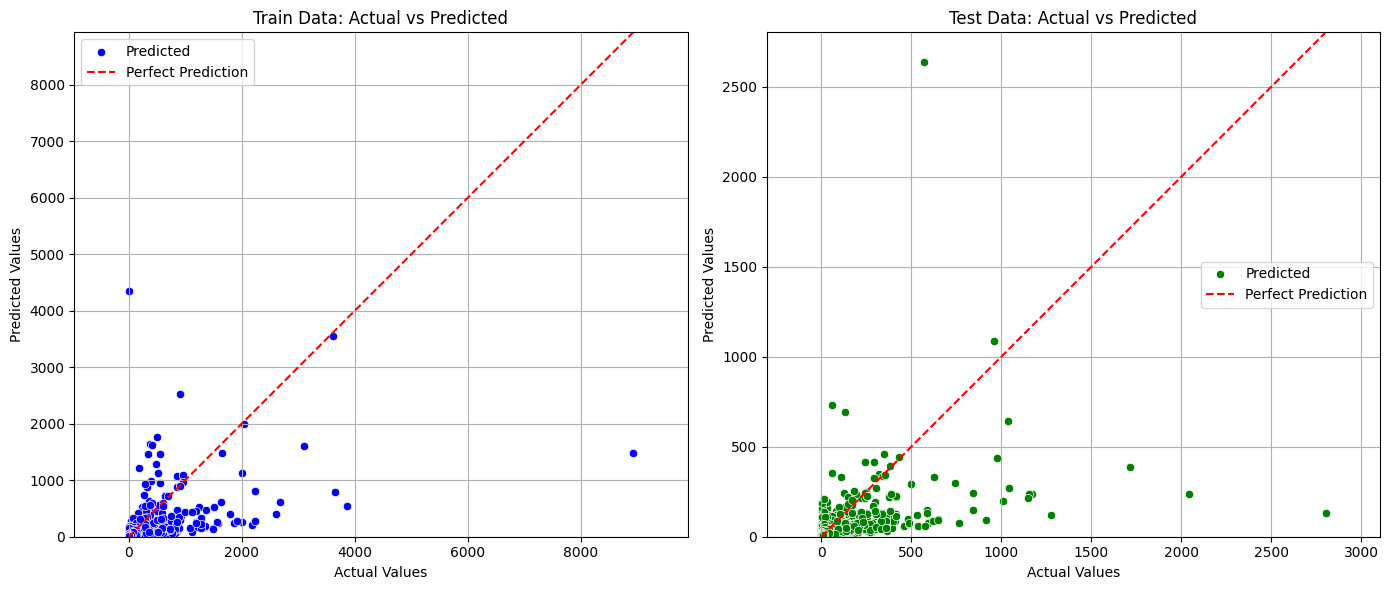

In [ ]:
plt.figure(figsize=(14, 6))

# Train Predictions Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(x=y_train, y=predictions_train, label='Predicted', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.grid()
plt.legend()

# Test Predictions Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.scatterplot(x=y_test, y=predictions_test, label='Predicted', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## **Decision Tree Regressor**

In [ ]:
dtr = DecisionTreeRegressor(max_depth=15, min_samples_split=3, min_samples_leaf=2)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=3)

In [ ]:
predictions_train1 = dtr.predict(x_train)
mse = mean_squared_error(y_train, predictions_train1)
r2 = r2_score(y_train, predictions_train1)
print("Train Mean Squared Error:", mse)
print("Train R-squared:", r2)
predictions_test1 = dtr.predict(x_test)
mse = mean_squared_error(y_test, predictions_test1)
r2 = r2_score(y_test, predictions_test1)
print("Test Mean Squared Error:", mse)
print("Test R-squared:", r2)

Train Mean Squared Error: 93.00274548001101
Train R-squared: 0.9560760973652486
Test Mean Squared Error: 63.01019112077268
Test R-squared: 0.9516109444903318


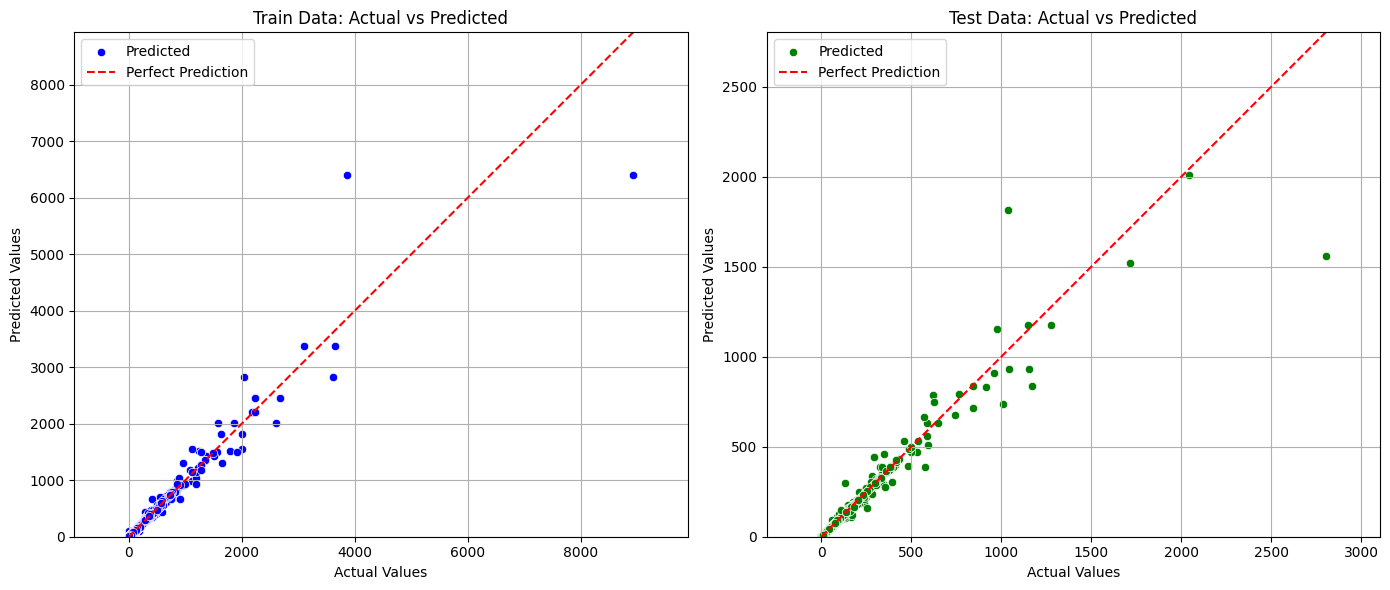

In [ ]:
plt.figure(figsize=(14, 6))

# Train Predictions Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(x=y_train, y=predictions_train1, label='Predicted', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.grid()
plt.legend()

# Test Predictions Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.scatterplot(x=y_test, y=predictions_test1, label='Predicted', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## **Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
predictions_train2 = rfr.predict(x_train)
mse = mean_squared_error(y_train, predictions_train2)
r2 = r2_score(y_train, predictions_train2)
print("Train Mean Squared Error:", mse)
print("Train R-squared:", r2)
predictions2 = rfr.predict(x_test)
mse = mean_squared_error(y_test, predictions2)
r2 = r2_score(y_test, predictions2)
print("Test Mean Squared Error:", mse)
print("Test R-squared:", r2)

Train Mean Squared Error: 51.19178779304663
Train R-squared: 0.9758228309162775
Test Mean Squared Error: 61.94097085642407
Test R-squared: 0.9524320586276379


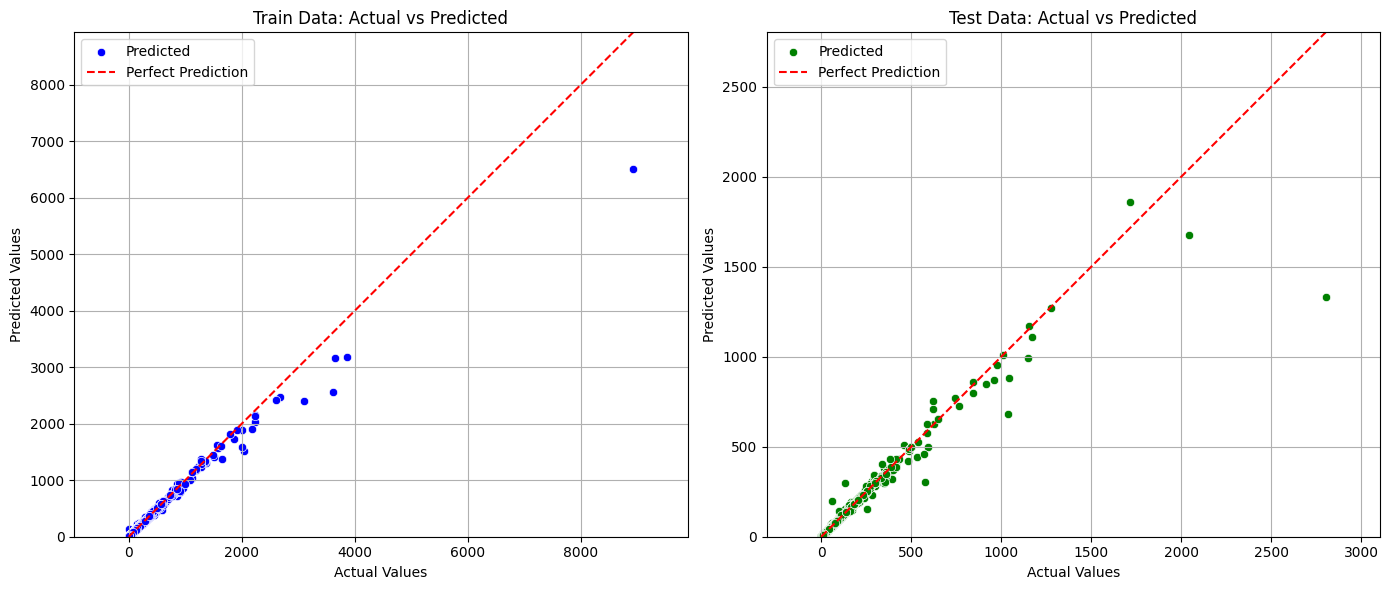

In [ ]:
plt.figure(figsize=(14, 6))

# Train Predictions Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(x=y_train, y=predictions_train2, label='Predicted', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.grid()
plt.legend()

# Test Predictions Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.scatterplot(x=y_test, y=predictions2, label='Predicted', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## **XGB Regressor**

In [89]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=200,
                             reg_alpha=0.01, max_depth=3,
                             learning_rate=0.05, reg_lambda=0.5)
xgb_model.fit(x_train, y_train)

# Predictions and Evaluation
predictions_xgb_train = xgb_model.predict(x_train)
mse = mean_squared_error(y_train, predictions_xgb_train)
r2 = r2_score(y_train, predictions_xgb_train)
print("Train Mean Squared Error:", mse)
print("Train R-squared:", r2)
predictions_xgb_test = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, predictions_xgb_test)
r2 = r2_score(y_test, predictions_xgb_test)
print("Test Mean Squared Error:", mse)
print("Test R-squared:", r2)


Train Mean Squared Error: 23.284216568330223
Train R-squared: 0.9890031884951868
Test Mean Squared Error: 68.46957318686526
Test R-squared: 0.9474183791743769


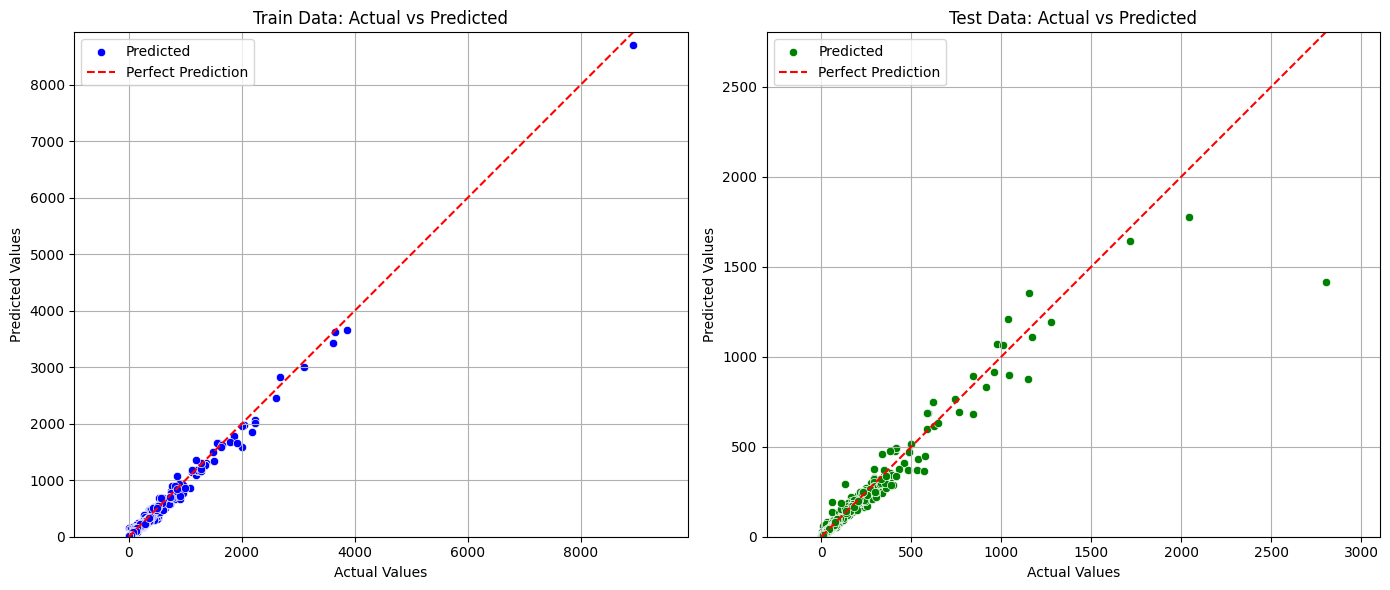

In [90]:
plt.figure(figsize=(14, 6))

# Train Predictions Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(x=y_train, y=predictions_xgb_train, label='Predicted', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.grid()
plt.legend()

# Test Predictions Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.scatterplot(x=y_test, y=predictions_xgb_test, label='Predicted', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: Actual vs Predicted')
plt.axis('equal')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()